# PCA and SVD

In the last class, we applied prinicipal component analysis to reduce the dimensionality of the iris flower dataset. For a given set of features, PCA performs orthogonal transformation to obtain a linear combination of features also known as principal components. For the iris dataset, the features are sepal length, sepal width, petal length and petal width. 

The first principal component is one such _axis_ along which the variance is maximum. What we mean by the last line is that the first principal component contains the maximum amount of information contained in all the features under consideration. The second principal component contains the next maximum amount of information, and so on. Usually the hope in a classification problem is that, one can extract the information contained in $N$ featuresusing $M$ principal components, where $N>>M$.

Let's quickly recall the PCA exercise for iris.

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from pandas.plotting import scatter_matrix, boxplot
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris=datasets.load_iris()

X = iris.data     # matrix 150x4
y = iris.target   # vector 150x1

pca_2c_model=PCA(n_components=2)
x_pca_2c=pca_2c_model.fit_transform(iris.data)

In [2]:
pca_2c_model.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

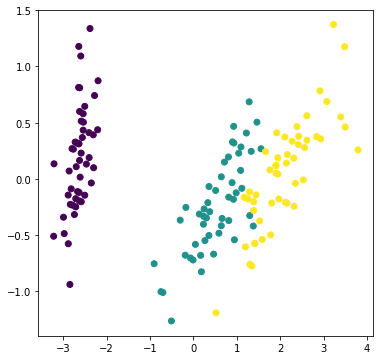

In [3]:
fig, ax = plt.subplots(figsize=(6,6))  # the subplot technique is used so that we can make the scatterplot square
ax.scatter(x_pca_2c[:,0],x_pca_2c[:,1],c=y)

## Singular value decomposition (SVD)

Let's have a quick look at the mathematical technique behind PCA. It's called singular value decomposition, shortly SVD. We are already somewhat familiar with the SVD concept. It is very similar to matrix diagonalization, except that our matrix need not be square and it can be rectangular.

In [4]:
iris=datasets.load_iris()

X = iris.data     # matrix 150x4
y = iris.target   # vector 150x1

# Standardize features (each column of X) by shifting w.r.t the mean (of that column)
Xc = X-np.mean(X,axis=0)

In [5]:
U,s,Vt=np.linalg.svd(Xc)

In [6]:
print("The sigular values are\n",s) # The should agree with pca_2c_model.singular_values_

The sigular values are
 [25.09996044  6.01314738  3.41368064  1.88452351]


In [7]:
print("Principal component vectors are\n",Vt) # same as pca_2c_model.components_ printed above

Principal component vectors are
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]
 [ 0.58202985 -0.59791083 -0.07623608 -0.54583143]
 [ 0.31548719 -0.3197231  -0.47983899  0.75365743]]


In [8]:
c1=Vt[0,:]  
print("First principal component is\n",c1)

First principal component is
 [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]


In [9]:
c2=Vt[1,:]
print("Second principal component is\n",c2)

Second principal component is
 [-0.65658877 -0.73016143  0.17337266  0.07548102]


In [10]:
Nc=2 # No. of components

W2=Vt[:Nc,:]    

X2D=np.dot(Xc,W2.T)   # Shape of Xc is 150x4,   Shape of W2=Vt[:Nc,:] is Ncx4,    Shape of W2.T is 4xNc
                      # Shape of X2D is 150xNc

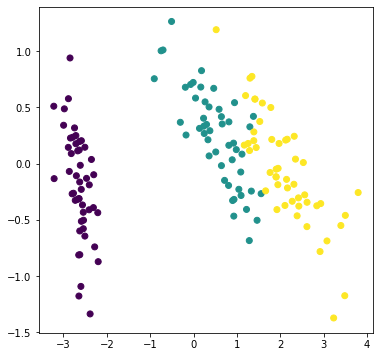

In [11]:
fig, ax = plt.subplots(figsize=(6,6))  
ax.scatter(X2D[:,0],X2D[:,1],c=y)

The scatterplot looks a little different than the earlier one because the phase of the second principal component has changed in our SVD. But, these phases are not important for application of SVD in PCA.

## Quantifying the model accuracy with `explained_variance`

In PCA, we quantify the model's accuracy using the error metric `explained_variance`. What this quantity contains is the information about the eigenvalues of the covariance matrix.

Let's get this score for the PCA model built with `sklearn`

In [12]:
print('Explained varaince is \n',pca_2c_model.explained_variance_)

Explained varaince is 
 [4.22824171 0.24267075]


In [13]:
print('Explained variance ratio is \n', pca_2c_model.explained_variance_ratio_)

Explained variance ratio is 
 [0.92461872 0.05306648]


These values mean that 92.5% of the information is contained in the first principal component, 5.3% in the second component. The rest, 2.2% is contained in the third and fourth components. 

Now, let us calculate the covariance for the principal components that we calculated with SVD. 

In [14]:
var=np.cov(X2D.T)
print(var)

[[ 4.22824171e+00 -1.06056980e-15]
 [-1.06056980e-15  2.42670748e-01]]


The covariance matrix is already diagonal as it is supposed to be. 

In [15]:
var=var.diagonal()
print(var)

[4.22824171 0.24267075]


To calculate the ratio of the variances, we need the total variance contained in the original set of features. 

In [16]:
all_var=np.cov(X.T)
all_var=all_var.diagonal()
print(all_var)

[0.68569351 0.18997942 3.11627785 0.58100626]


In [17]:
norm_var=var/np.sum(all_var)
print(norm_var)

[0.92461872 0.05306648]


The last lines contains the same values obtained by using `pca_2c_model.explained_variance_ratio_`. Now, we have good idea about how PCA works and its connection to the numerical method SVD. 

Remember, PCA is one of the most popular techniques for dimensionality reduction.